In [1]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt
import re
import random as ra
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
path = '/content/drive/MyDrive/Colab Work/Computational Convex Optimization/files/manhattan.txt'

##Exercise 1

In [ ]:
#function that computes the manhattan distance between nodes
def compute_manhattan_distance(x1,y1,x2,y2):
  return abs(x1-x2)+abs(y1-y2)

In [ ]:
def sweet_locations(path, should_print):
  '''
  Function that builds the nodes of a graph with their respective coordinates
  from a file.
  Input: 
    path: path where the coordinates of the nodes can be found
    should_print: 1 if the graphic of the graph should be printed
  Output:
    G: The instance of a graph
    pos: the coordinates of each of the nodes in the instance G
  '''
  fh = open(path, 'r')

  G = nx.Graph() 
  pos = {}
  
  #Finds the coordinates of each node on the given file
  i=0
  for line in fh.readlines():
    (x,y) = re.findall(r'\d+.\d+,\d+.\d+', line)[0].split(',')
    G.add_node(i, x_cord=float(x), y_cord=float(y))
    pos[i]=(float(x), float(y))
    i = i+1

  n = nx.number_of_nodes(G)
  
  #Adds the edges of the graph with their respectice weight (euclidean distance)
  for i in range(0,n):
    for j in range(i+1,n):
      G.add_edge(i,j, weight=compute_manhattan_distance(G.nodes[i]['x_cord'],G.nodes[i]['y_cord'],G.nodes[j]['x_cord'],G.nodes[j]['y_cord']))

  #part that makes the graphic of the graph
  if should_print == 1:
    print("Here is the graph with %d nodes we sampled" % n)
            
    nx.draw_networkx(G,pos,node_size=200)
    nx.draw_networkx_labels(G,pos)
                
    plt.show()

  return (G,pos)

Here is the graph with 18 nodes we sampled


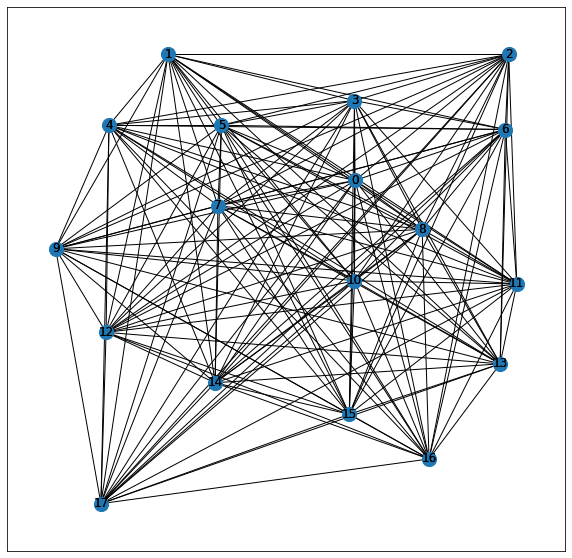

In [ ]:
(Gw,pos)=sweet_locations(path, 1)

In [ ]:
### Function implementing the Greedy algorithm for TSP 
### Prints the tour it finds, and its picture
### Input: G= Graph (in networkX format); pos=2-dimensional coordinates of the input; should_print=0/1 (1 to plot a picture of the tour found, 0 otherwise)
### Output: none

def run_greedy_TSP(G,pos,should_print):   

    start_time = time.time()
    
    n=nx.number_of_nodes(G)
    tour=[0]
    nr_cities=0
    length_tour=0


    while nr_cities<n-1:
        min_weight=999999
        candidate=-1
        for i in range(n):
            if (i not in tour):
                if G.edges[tour[nr_cities],i]['weight'] < min_weight:
                    min_weight=G.edges[tour[nr_cities],i]['weight']
                    candidate=i
        tour.append(candidate)
        nr_cities=nr_cities+1
        length_tour=length_tour+min_weight

    length_tour=length_tour+G.edges[0,tour[n-1]]['weight']

    final_time=time.time() - start_time

    # if should_print=1, we plot the tour
    if should_print == 1:
        print(" **** Greedy Algorithm ***")
        print("")
        print("")
        G_final=nx.Graph()
        for i in range(n-1):
            G_final.add_edge(tour[i],tour[i+1])
        G_final.add_edge(tour[0],tour[n-1])            
        nx.draw_networkx_labels(G_final,pos)
        nx.draw_networkx(G_final,pos,node_size=200)
        plt.show()
          
    print ("The greedy tour is %s and its total length is %f" % (tour,length_tour))
    print("Running time of the greedy algorithm: %s seconds" % final_time) 
    print("")

    
    return length_tour 

 **** Greedy Algorithm ***




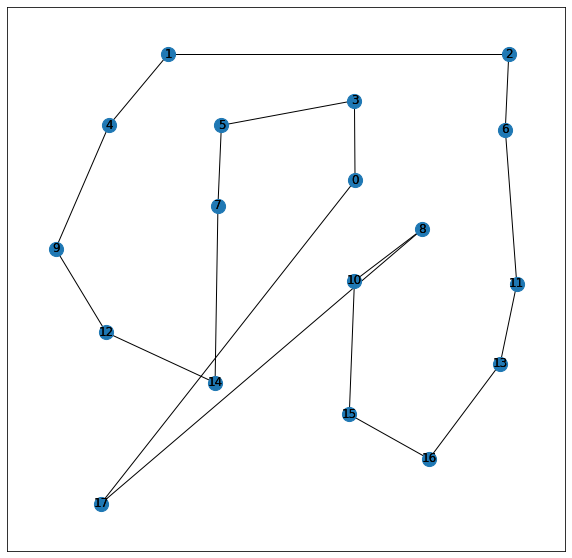

The greedy tour is [0, 3, 5, 7, 14, 12, 9, 4, 1, 2, 6, 11, 13, 16, 15, 10, 8, 17] and its total length is 64.180000
Running time of the greedy algorithm: 0.00043892860412597656 seconds



64.18

In [ ]:
run_greedy_TSP(Gw, pos,1)

##Exercise 3

In [3]:
#Function that computes euclidean distance 
def compute_distance (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**(.5)

In [7]:
## Code for Prim's algorithm

def run_prims_MST(G, starting_node, should_print):
  '''
  Function that runs prim's algorithm to find a MST
  Input:
    G: instance of a graph
    starting node: node from which the algorithm will search for a MST
    should_print: 1 if the graphic of the final Tree should be printed
  Output:
    total_weight: sum of the weights on the edges of the MST
  '''
  start_time = time.time()

  G_final = nx.Graph()
  G_final.pos = {}
  G_final.pos[starting_node] = G.pos[starting_node]
  s = [starting_node]
  v = [n for n,v in G.nodes(data=True)]
  v.remove(starting_node)
  n = nx.number_of_nodes(G)
  total_weight=0
  while len(s) < n:
    min_weight = 999999
    for nodes in s:
      for nodes_2 in v:
        if ((nodes, nodes_2) in G.edges()) and (G.edges[nodes,nodes_2]['weight'] < min_weight):
          min_weight = G.edges[nodes,nodes_2]['weight']
          candidate = nodes_2
          candidate_1 = nodes
    v.remove(candidate)
    s.append(candidate)
    G_final.add_edge(candidate_1, candidate, weight = min_weight)
    G_final.pos[candidate] = G.pos[candidate]
    total_weight = total_weight + min_weight
  
  total_time=time.time() - start_time

  if should_print == 1:
    #
    # If should_print=1, plot MST
    #
    print("")
    print(" **** Prim's - Minimum Spanning Tree ***")
    print("")
    print("Here is  the minimum spanning tree:")

    nx.draw_networkx(G_final,G_final.pos,node_size=200)
    plt.show() 

    print("The MST total length is %f" % (total_weight))
    print("Running time of Prim's MST algorithm: %s seconds" % total_time) 
    print("")        

  return total_weight, total_time

In [8]:
## Code for implementation-friendly Prim's algorithm

def run_friendly_prims_MST(G, starting_node, should_print):
  '''
  Function that runs the implementation-friendly version of prim's algorithm to find a MST
  Input:
    G: instance of a graph
    starting node: node from which the algorithm will search for a MST
    should_print: 1 if the graphic of the final Tree should be printed
  Output:
    total_weight: sum of the weights on the edges of the MST
  '''

  start_time = time.time()

  G_final = nx.Graph()
  G_final.pos = {}
  G_final.pos[starting_node] = G.pos[starting_node]
  s = [starting_node]
  v = [n for n,v in G.nodes(data=True)]
  v.remove(starting_node)
  n = nx.number_of_nodes(G)
  close = {}
  total_weight=0

  ###############
  for node in v:
    if ((node, starting_node) in G.edges()): 
      close[node] = starting_node
    else:
      close[node] = -1

  while len(s) < n:
    min_weight = 999999
    for node in v:
      if (node, close[node]) in G.edges():
        if G.edges[node, close[node]]['weight'] < min_weight:
          min_weight = G.edges[node,close[node]]['weight']
          candidate = node
    v.remove(candidate)
    s.append(candidate)
    G_final.add_edge(candidate, close[candidate], weight = min_weight)
    G_final.pos[candidate] = G.pos[candidate]
    total_weight = total_weight + min_weight
    for node in v:
      if G.edges[node, close[node]]['weight'] > G.edges[node, candidate]['weight']:
        close[node] = candidate

  total_time=time.time() - start_time

  if should_print == 1:
    #
    # If should_print=1, plot MST
    #
    print("")
    print(" **** Implementation-friendly Prim's - Minimum Spanning Tree ***")
    print("")
    print("Here is  the minimum spanning tree:")

    nx.draw_networkx(G_final,G_final.pos,node_size=200)
    plt.show() 

    print("The MST total length is %f" % (total_weight))
    print("Running time of Implementation-friendly Prim's MST algorithm: %s seconds" % total_time) 
    print("")        

  return total_weight, total_time

In [9]:
def random_instance_cgraph(n, should_print, node_size):
  g = nx.Graph()
  n = n
  # we create an empty dictionary pos. for each node i, pos[i] is a 2-dim array denoting the position of the point in the plane

  

  g.pos={}

  for i in range(n):
      x=np.random.random_sample() # randomly sample from [0,1)
      y=np.random.random_sample()
      g.add_node(i)#,x=x,y=y)
      g.pos[i]=(x,y)     # coordinates for drawing
        
  for i in range(n-1):
    for j in range(i+1,n):
      g.add_edge(i,j, weight = compute_distance(g.pos[i][0], g.pos[i][1],g.pos[j][0], g.pos[j][1]))

  if should_print == 1:
    print("")
    print("Here is the initial graph with %i nodes:" % (n))

    nx.draw_networkx(g,pos=g.pos,node_size=node_size)
    plt.show()

  return g

In [14]:
weight_50_p = []
time_50_p = []
weight_100_p = []
time_100_p = []
weight_200_p = []
time_200_p = []
weight_50_fp = []
time_50_fp = []
weight_100_fp = []
time_100_fp = []
weight_200_fp = []
time_200_fp = []

for i in range(20):
  g = random_instance_cgraph(50, 0, 400)
  a,b = run_prims_MST(g, 2, 0)
  weight_50_p.append(a)
  time_50_p.append(b)
  a,b = run_friendly_prims_MST(g, 2, 0)
  weight_50_fp.append(a)
  time_50_fp.append(b)
  g2 = random_instance_cgraph(100, 0, 400)
  a,b = run_prims_MST(g2, 2, 0)
  weight_100_p.append(a)
  time_100_p.append(b)
  a,b = run_friendly_prims_MST(g2, 2, 0)
  weight_100_fp.append(a)
  time_100_fp.append(b)
  g3 = random_instance_cgraph(200, 0, 400)
  a,b = run_prims_MST(g3, 2, 0)
  weight_200_p.append(a)
  time_200_p.append(b)
  a,b = run_friendly_prims_MST(g3, 2, 0)
  weight_200_fp.append(a)
  time_200_fp.append(b)

column_names = ["Prim_50_w", "Prim_50_t", "fPrim_50_w", "fPrim_50_t", "Prim_100_w", "Prim_100_t", "fPrim_100_w", "fPrim_100_t", "Prim_200_w", "Prim_200_t", "fPrim_200_w", "fPrim_200_t",]
results = pd.DataFrame(list(zip(weight_50_p,time_50_p,weight_50_fp,time_50_fp,weight_100_p,time_100_p,weight_100_fp,time_100_fp,weight_200_p,time_200_p,weight_200_fp,time_200_fp)), columns =column_names)

In [17]:
final_results = results[["Prim_50_t", "fPrim_50_t", "Prim_100_t", "fPrim_100_t", "Prim_200_t", "fPrim_200_t",]]
print(final_results.to_latex(index=False)) 

\begin{tabular}{rrrrrr}
\toprule
 Prim\_50\_t &  fPrim\_50\_t &  Prim\_100\_t &  fPrim\_100\_t &  Prim\_200\_t &  fPrim\_200\_t \\
\midrule
  0.060232 &    0.007373 &    0.535585 &     0.030540 &    4.293707 &     0.123553 \\
  0.059781 &    0.007311 &    0.508135 &     0.029706 &    4.277281 &     0.121084 \\
  0.061232 &    0.007396 &    0.511124 &     0.030219 &    4.264670 &     0.126319 \\
  0.061837 &    0.007615 &    0.507392 &     0.029896 &    4.278394 &     0.126259 \\
  0.063822 &    0.007447 &    0.499333 &     0.029989 &    4.290603 &     0.127256 \\
  0.063626 &    0.007629 &    0.505499 &     0.030082 &    4.300849 &     0.126693 \\
  0.061696 &    0.007546 &    0.495258 &     0.029425 &    4.278869 &     0.132438 \\
  0.062599 &    0.007452 &    0.496086 &     0.030858 &    4.229671 &     0.125119 \\
  0.062713 &    0.007317 &    0.490794 &     0.029892 &    4.295699 &     0.128255 \\
  0.061896 &    0.007441 &    0.493475 &     0.030295 &    4.283144 &     0.125099 \\



Here is the initial graph with 50 nodes:


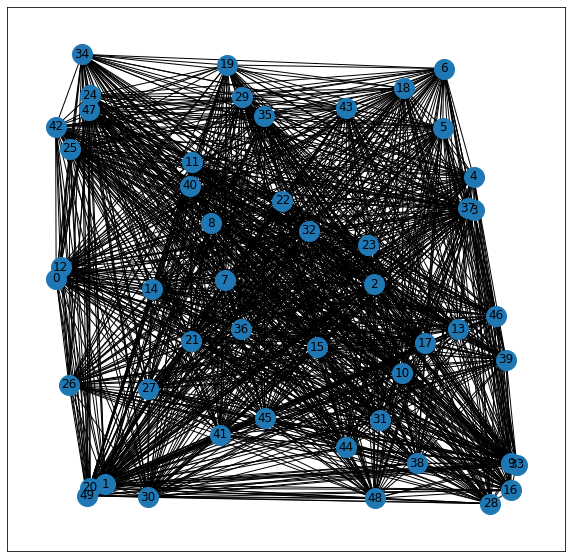


 **** Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


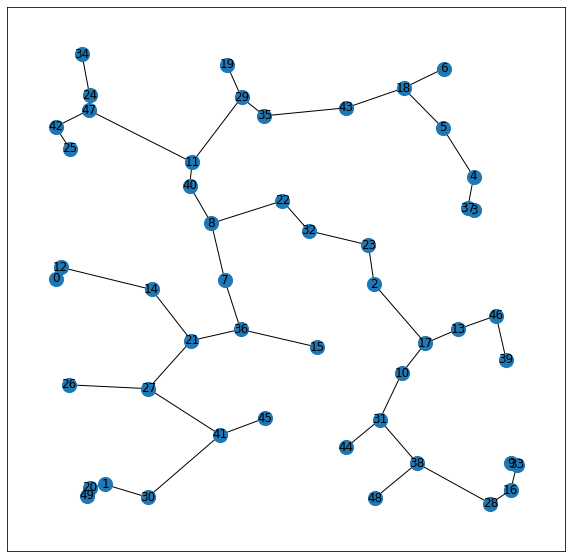

The MST total length is 5.242922
Running time of Prim's MST algorithm: 0.1370694637298584 seconds


 **** Implementation-friendly Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


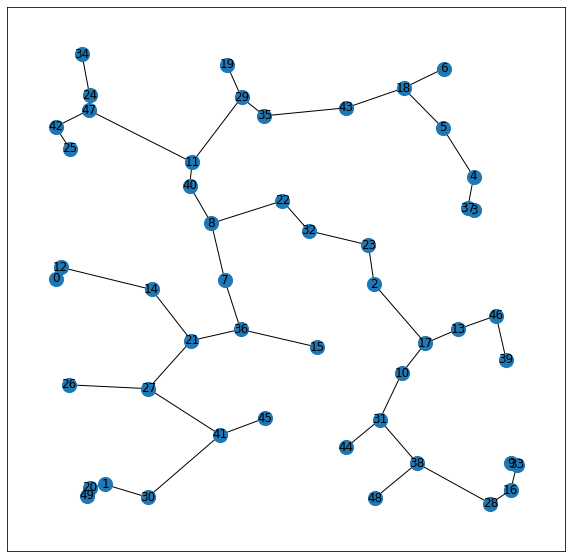

The MST total length is 5.242922
Running time of Implementation-friendly Prim's MST algorithm: 0.008063077926635742 seconds



In [ ]:
#MST algorithms for a graph of 50 nodes
g = random_instance_cgraph(50, 1, 400)
g_weight = run_prims_MST(g, 2, 1)
g_weight_2 = run_friendly_prims_MST(g, 2, 1)


Here is the initial graph with 100 nodes:


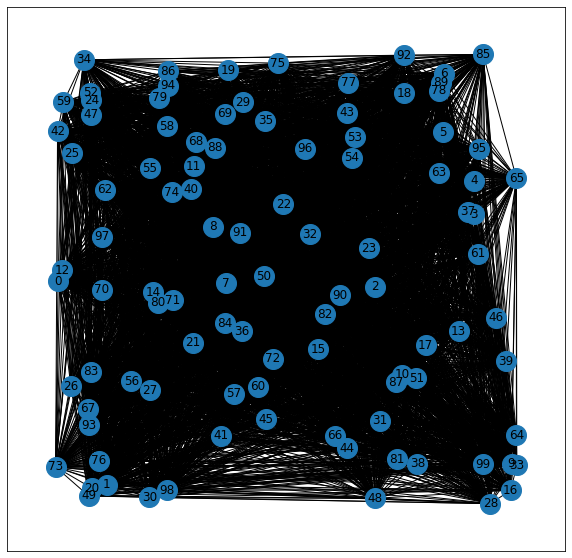


 **** Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


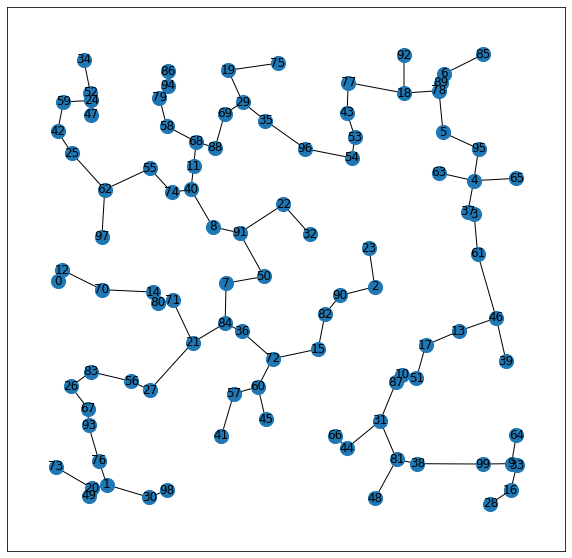

The MST total length is 6.967750
Running time of Prim's MST algorithm: 0.5899488925933838 seconds


 **** Implementation-friendly Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


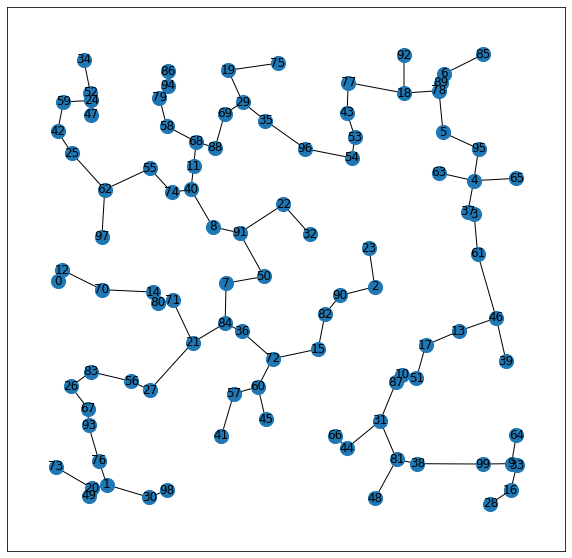

The MST total length is 6.967750
Running time of Implementation-friendly Prim's MST algorithm: 0.04578065872192383 seconds



In [ ]:
#MST algorithms for a graph of 100 nodes
g = random_instance_cgraph(100, 1, 400)
g_weight = run_prims_MST(g, 2, 1)
g_weight_2 = run_friendly_prims_MST(g, 2, 1)


Here is the initial graph with 200 nodes:


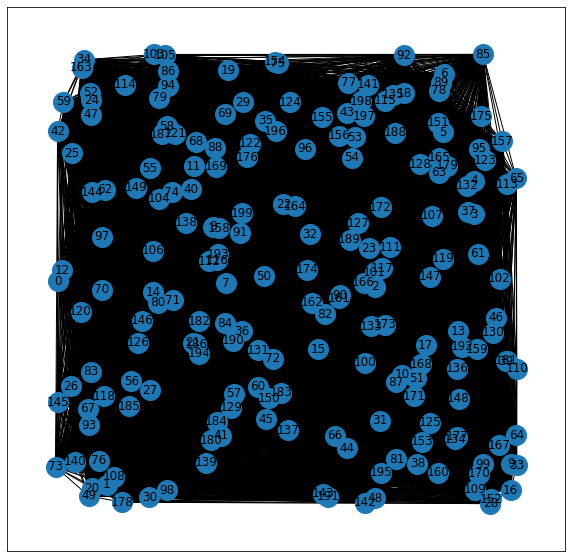


 **** Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


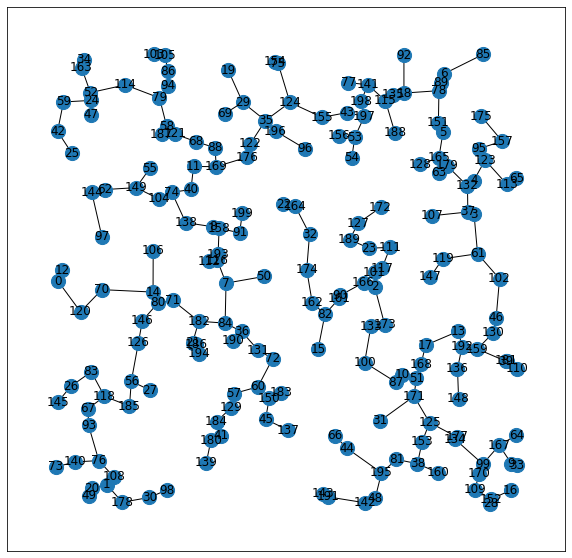

The MST total length is 9.618484
Running time of Prim's MST algorithm: 4.42504620552063 seconds


 **** Implementation-friendly Prim's - Minimum Spanning Tree ***

Here is  the minimum spanning tree:


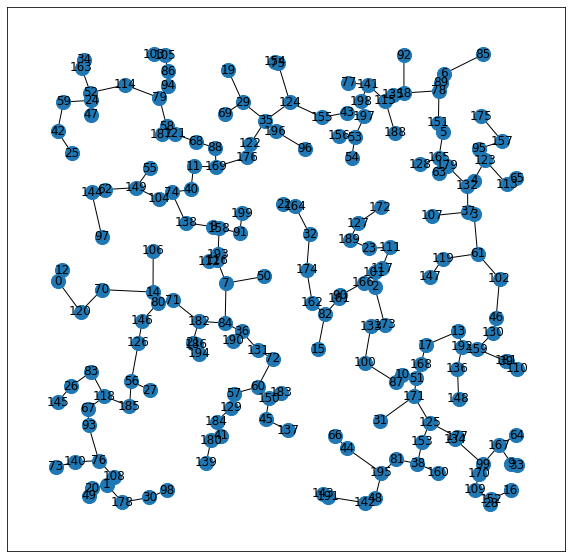

The MST total length is 9.618484
Running time of Implementation-friendly Prim's MST algorithm: 0.1640937328338623 seconds



In [ ]:
#MST algorithms for a graph of 200 nodes
g = random_instance_cgraph(200, 1, 400)
g_weight = run_prims_MST(g, 2, 1)
g_weight_2 = run_friendly_prims_MST(g, 2, 1)